## Entendendo a Regressão Linear

### Part 1 - Pré-Processamento dos Dados

#### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#### Importando os dados

In [2]:
data = pd.read_csv('consumo_cerveja.csv',sep = ',',decimal=',')

# sep =  Simbolo que se separa os dados uns dos outros
# decimal = simbolo que se separa casas decimais ( O Python não le 21,9 mas 21.9 )

##### Alterando o nome das colunas

In [3]:
data.columns = ['Data', 'Temperatura_Media', 'Temperatura_Minima',
              'Temperatura_Maxima', 'Precipitacao',
              'Final_de_Semana', 'Consumo']

#### Visualizando os dados

In [4]:
data.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


##### Analisando a quantidade de dados nulos

In [5]:
data.isnull().sum()

Data                  576
Temperatura_Media     576
Temperatura_Minima    576
Temperatura_Maxima    576
Precipitacao          576
Final_de_Semana       576
Consumo               576
dtype: int64

##### Deletando os dados nulos

In [6]:
data.dropna(inplace = True)

##### Analisando o tamanho do Data Set

In [7]:
data.shape

(365, 7)

##### Analisando o tipo de dado

In [8]:
data.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana       float64
Consumo                object
dtype: object

##### Mudando o tipo de dado da variável "Data"

In [9]:
data.Data = pd.to_datetime(data.Data)
#data.set_index('Data',inplace = True)

##### Mudando o tipo de dado da variável "consumo"

In [10]:
data.Consumo = data.Consumo.astype(str)
data.Consumo = data.Consumo.str.replace('.', '')

data['Consumo'] = pd.to_numeric(data['Consumo'])


### Part 2 - Pré Análise dos dados

##### Estatísticas descritivas

In [11]:
data.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


##### Matriz de correlação 

obs: Correlação não é multicolinearidade

In [12]:
data.corr(method='pearson')

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
Temperatura_Media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [13]:
data.corr(method = 'spearman')

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
Temperatura_Media,1.000000,0.864661,0.912867,0.017111,-0.039258,0.569998
Temperatura_Minima,0.864661,1.000000,0.664436,0.166770,-0.050208,0.391495
Temperatura_Maxima,0.912867,0.664436,1.000000,-0.116672,-0.023907,0.641289
Precipitacao,0.017111,0.166770,-0.116672,1.000000,0.003799,-0.172381
Final_de_Semana,-0.039258,-0.050208,-0.023907,0.003799,1.000000,0.497192
Consumo,0.569998,0.391495,0.641289,-0.172381,0.497192,1.000000


### Entendendo o comportamento da variável dependente (Y)

##### Comportamento Temporal

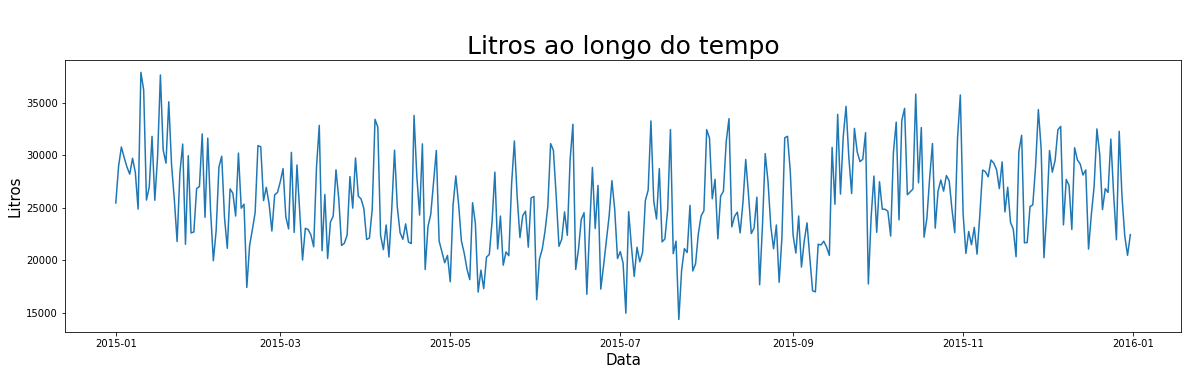

In [14]:
plt.figure(figsize = (20,5))

plt.title('\nLitros ao longo do tempo',size = 25)
plt.plot(data['Data'],data['Consumo'])
plt.xlabel('Data',size = 15)
plt.ylabel('Litros',size = 15)

plt.show()

##### Sazonalidade

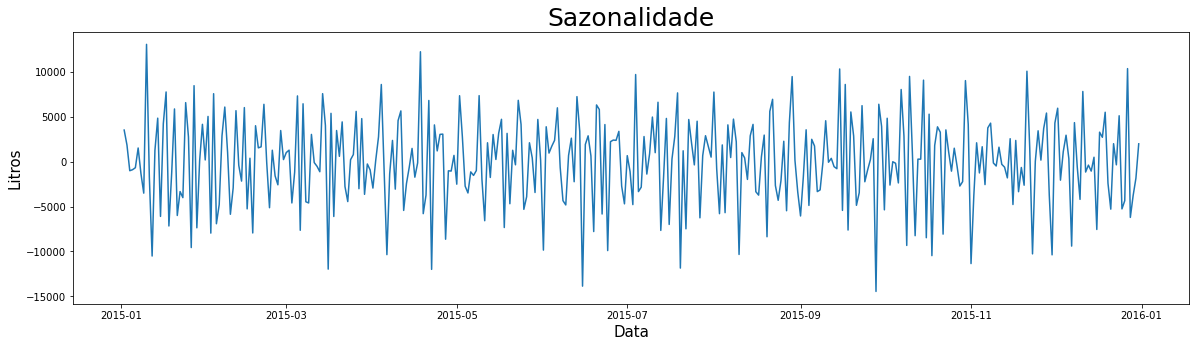

In [15]:
plt.figure(figsize = (20,5))

plt.title('Sazonalidade',size = 25)
plt.xlabel('Data',size = 15)
plt.ylabel('Litros',size = 15)

plt.plot(data['Data'],data['Consumo'].diff())

plt.show()

##### Médias Móveis Semestrais

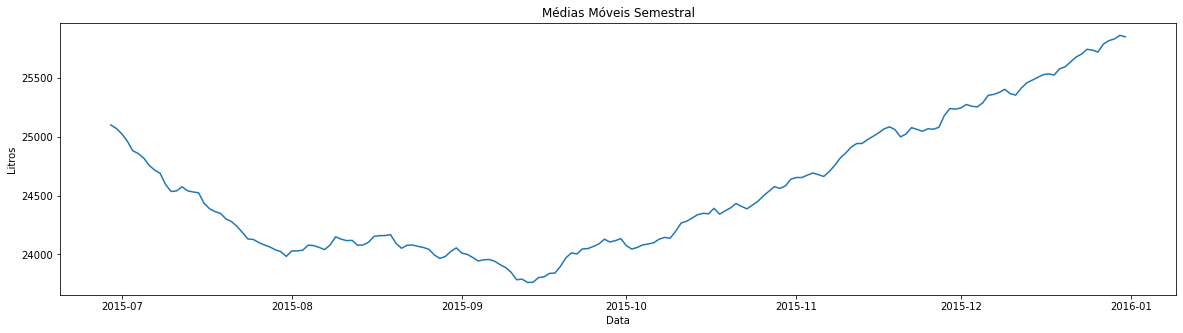

In [16]:
plt.figure(figsize = (20,5))

plt.title('Médias Móveis Semestral')
plt.xlabel('Data')
plt.ylabel('Litros')

plt.plot(data['Data'],data['Consumo'].rolling(180).mean())

plt.show()

##### BoxPlot

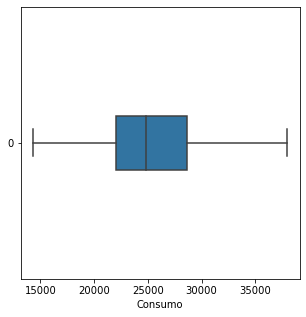

In [17]:
plt.figure(figsize = (5,5))

sns.boxplot(data = data['Consumo'],orient = 'h',width = 0.2 )
plt.title('')
# orient - Define se o gráfico será plotado na Vertival (v) ou Horizontal (h)
# width - Ageita a largura do BoxPlot
plt.xlabel('Consumo')
plt.show()

# Neste caso não observamos outliers

##### Sabendo se o consumo aumenta ou diminui aos finais de semana

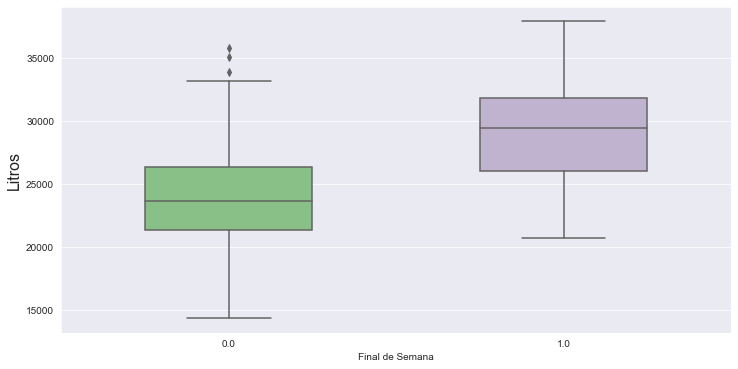

In [18]:
# Para mudar as cores dos blocos
sns.set_palette('Accent')
# Para mudar o estilo do gráfico
sns.set_style('darkgrid')

#Plotando o gráfico
ax = sns.boxplot(y = 'Consumo',x = 'Final_de_Semana',data = data,orient = 'v',width = 0.5 )

# Escolhendo o tamanho
ax.figure.set_size_inches(12,6)

# Mudando o título do eixo y
ax.set_ylabel('Litros',fontsize = 16)

# Mudando o título do eixo x
ax.set_xlabel('Final de Semana')

plt.show()

# Podemos dizer que o consumo aumenta aos finais de semana

### Distribuição

###### Modelos de Regressão Linear assumem inicialmente que a variável dependente segue uma distribuição normal

##### Temos um teste informal usando gráfico, no qual utilizamos a própria visualização para saber se segue uma distribuição normal ou não

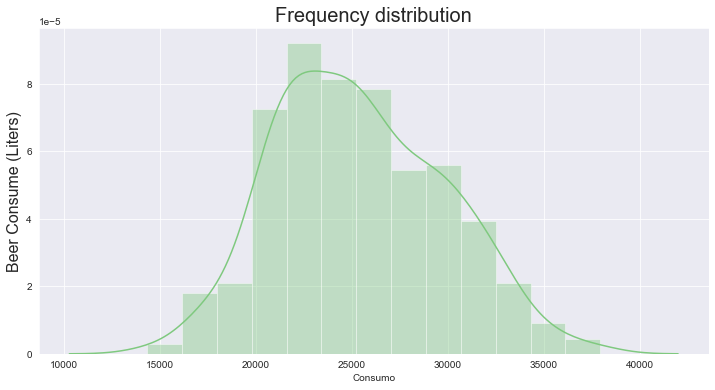

In [19]:
ax = sns.distplot(data['Consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency distribution',fontsize = 20)
ax.set_ylabel('Beer Consume (Liters)',fontsize = 16)

plt.show()

##### Mas temos os testes formais que tendem a ser mais eficiêntes como por exemplo o Teste de Hipóteses analisando o value-p

In [20]:
import scipy.stats as stats
from scipy.stats import normaltest
from scipy import stats

stat_test,p_value = normaltest(data['Consumo'])

p_value = p_value

if p_value < 0.05:
    print(f'This dataset follows a normal distribution, p-value = {round(p_value,4)}')
else:
    print(f"this dataset doens't follor a noraml distribution, p-value = {round(p_value,4)}")

This dataset follows a normal distribution, p-value = 0.0197


### Analisando a variável dependente (Y) com variável explicativas (X)

#### Plotando o relacionamento entre pares de variáveis de um dataset

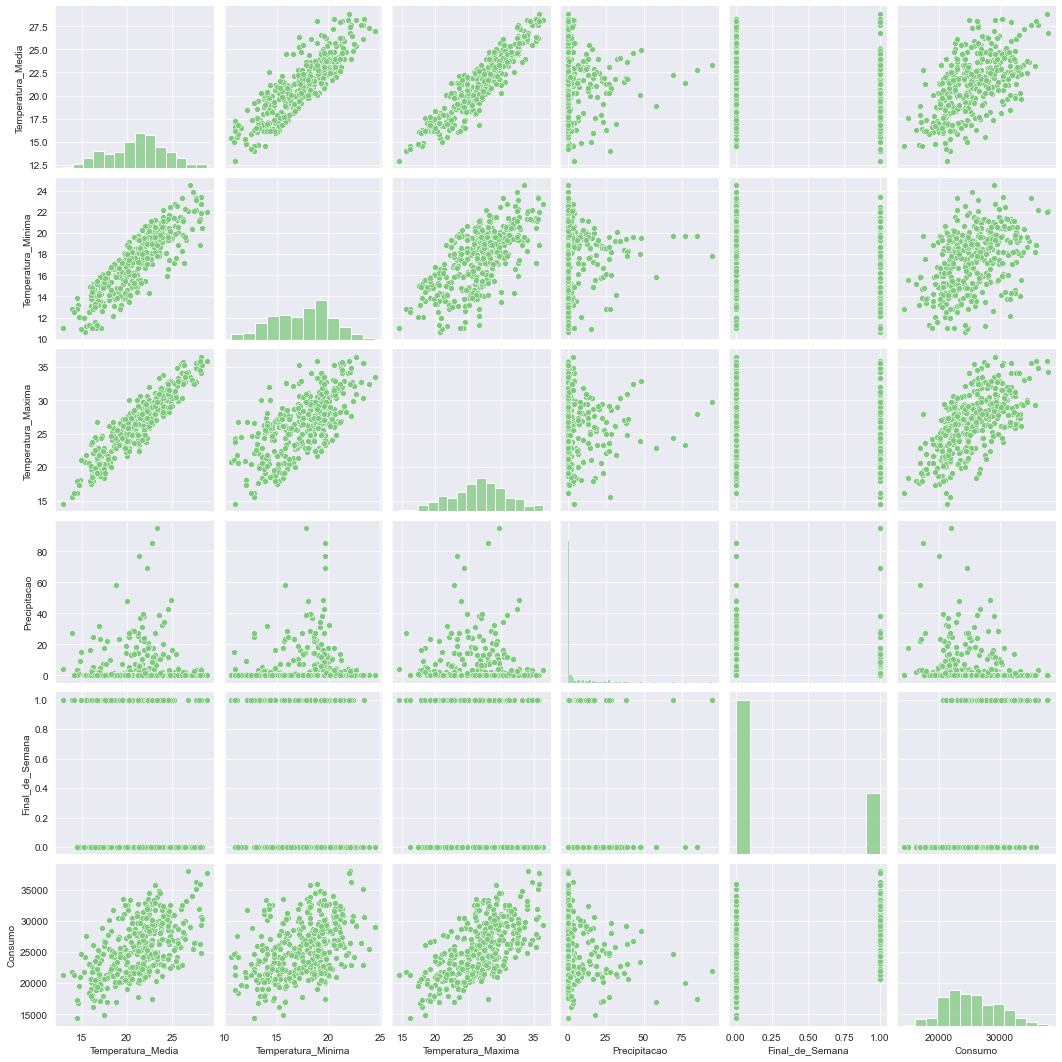

In [21]:
ax = sns.pairplot(data)

#### Plotando o pairplot somente fixando uma veriável no eixo Y

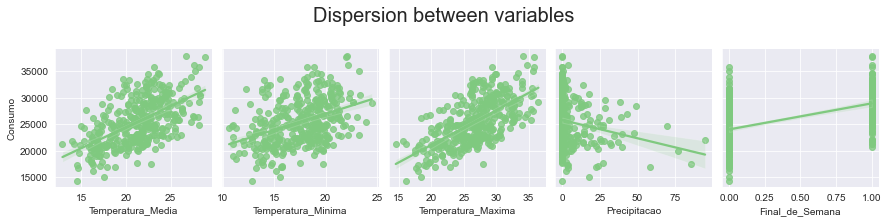

In [22]:
ax = sns.pairplot(data,y_vars = 'Consumo', x_vars = ['Temperatura_Media','Temperatura_Minima',
                                                     'Temperatura_Maxima','Precipitacao',
                                                     'Final_de_Semana'],kind = 'reg')

# No kind o default será scatter, mas poderemos usar o 'reg', para plotar uma reta
ax.fig.suptitle('Dispersion between variables',fontsize = 20,y = 1.20)
plt.show()

# Podemos observar que, quanto maior a temperatura mais as pessoas bebem
# Quanto mais chove menos as pessoas bebem
# As pessoas bebem mais ao final de semana

#### joinplot - Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência

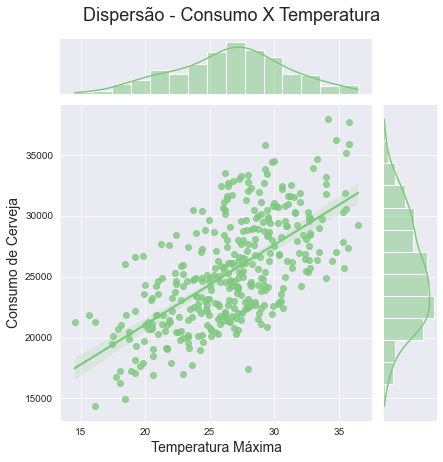

In [23]:
ax = sns.jointplot(x = 'Temperatura_Maxima',y = 'Consumo',data = data,kind = 'reg')

ax.figure.suptitle('Dispersão - Consumo X Temperatura',fontsize = 18,y = 1.05)
ax.set_axis_labels('Temperatura Máxima','Consumo de Cerveja',fontsize = 14)

plt.show()

#### lmplot - Plota a reta da regressão entre duas variáveis com a dispersão entre elas

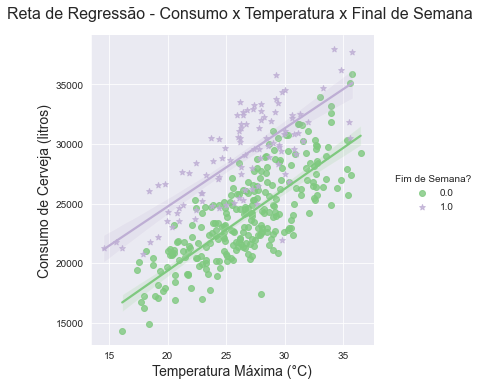

In [24]:
ax = sns.lmplot(x = 'Temperatura_Maxima',y = 'Consumo',data = data,hue = 'Final_de_Semana',
                markers = ['o','*'], legend = False)

ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana',
               fontsize = 16, y = 1.05)

ax.set_xlabels('Temperatura Máxima (°C)',fontsize = 14)
ax.set_ylabels('Consumo de Cerveja (litros)',fontsize = 14)
ax.add_legend(title = 'Fim de Semana?')
plt.show()

#### De forma parecida basta porem separando os gráficos basta substituirmos "hue" por "col"

[]

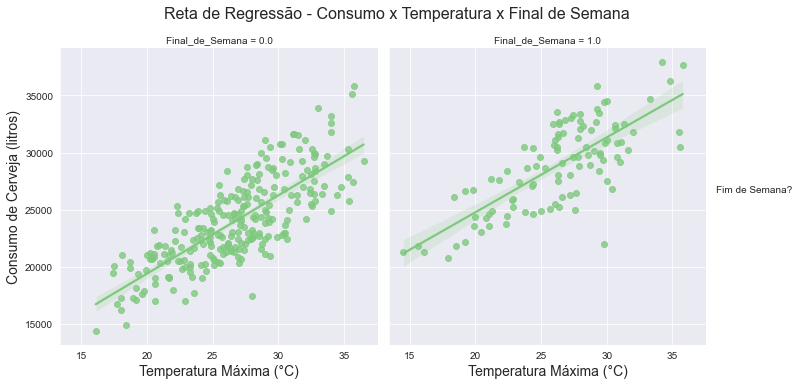

In [25]:
ax = sns.lmplot(x = 'Temperatura_Maxima',y = 'Consumo',data = data,col = 'Final_de_Semana')

ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana',
               fontsize = 16, y = 1.05)

ax.set_xlabels('Temperatura Máxima (°C)',fontsize = 14)
ax.set_ylabels('Consumo de Cerveja (litros)',fontsize = 14)
ax.add_legend(title = 'Fim de Semana?')

plt.plot()

### Regressão Linear - Construindo o Modelo

#### Importando a biblioteca train_test_split

In [26]:
from sklearn.model_selection import train_test_split

#### Separando as variáveis "Target" e "Features"

In [27]:
y = data['Consumo']

# Não se esquecer de usar dois colchetes
# Não usar variáveis muito correlacionadas entre sí
x = data[['Temperatura_Maxima','Precipitacao',
         'Final_de_Semana']]



#### Criando os datasets de treino e de teste

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 2811)

#### Verificando o tamanho dos arquivos gerados

In [29]:
print('Tamanho dos dados de treino',x_train.shape)
print('Tamanho dos dados de teste',x_test.shape)

Tamanho dos dados de treino (255, 3)
Tamanho dos dados de teste (110, 3)


##### Importando a bliblioteca da Regressão Linear pelo Sklearn

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### Criando o modelo

In [31]:
model = LinearRegression()

##### Utilizando os dados de treino e de teste para treinar o modelo

In [32]:
model.fit(x_train,y_train)

LinearRegression()

##### Obtendo o Coeficiênte de determinação R² para os dados de TREINO (O quanto a nossa reta consegue explicar a nossa variável Y)

In [33]:
print(f'The R² is  {round(model.score(x_train,y_train),2)}')

The R² is  0.73


##### Obtendo o Coeficiênte de determinação R² para os dados de TESTE

In [34]:
print(f'The R² is de {round(model.score(x_test,y_test),2)}')

The R² is de 0.69


In [35]:
from sklearn.metrics import mean_absolute_error,r2_score,median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

y_pred = model.predict(x_test)

print("Mean absolute error :", round(mean_absolute_error(y_test,y_pred),2))
print("Mean squared error :", round(mean_squared_error(y_test,y_pred),2))
print("Median absolute error :", round(median_absolute_error(y_test,y_pred),2))
print("Explained variance score :", round(explained_variance_score(y_test,y_pred),5))
print("R² : ", round(r2_score(y_test, y_pred),5))



Mean absolute error : 1966.56
Mean squared error : 5471976.38
Median absolute error : 1852.72
Explained variance score : 0.69075
R² :  0.69074


## Regressão Linear - Obtendo Previsões Pontuais 

##### Dados de entrada

In [36]:
entrada = x_test[0:1]
entrada

,Temperatura_Maxima,Precipitacao,Final_de_Semana
5,30.5,12.2,0.0


##### Gerando previsão pontual

In [37]:
previsao = model.predict(entrada)[0]
previsao.round(2)

26094.9

##### Criando um simulador simples

In [38]:
temp_max = 30.5
chuva = 12.2
fds  = 0
entrada = [[temp_max,chuva,fds]]
print(f'{model.predict(entrada)[0].round(2)}')

26094.9


## Regressão Linear - Interpretando o Modelos

##### Obtendo os coeficiêntes 

In [39]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [40]:
model.intercept_

5951.9763393124485

In [41]:
type(model.coef_)

numpy.ndarray

##### Confirmando a Ordem das variáveis

In [42]:
x.columns

Index(['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana'], dtype='object')

##### Criando uma lista com o nome das variáveis do modelo

In [43]:
index = ['Intercept','Max Temperature','Precipitation (mm)','Weekend']

##### Criando um Data Frame para armazenar os coeficientes do modelo

In [44]:
pd.DataFrame(data = np.append(model.intercept_,model.coef_),
             index = index,columns = ['Parameters'])

,Parameters
Intercept,5951.976339
Max Temperature,684.736759
Precipitation (mm),-60.782435
Weekend,5401.083339


In [45]:
model.predict([[23.78,12.2,0]])

array([21493.47075489])

## Regressão Linear - Análises Gráficas da previsão do Modelo

In [46]:
y_previsto_train = model.predict(x_train)

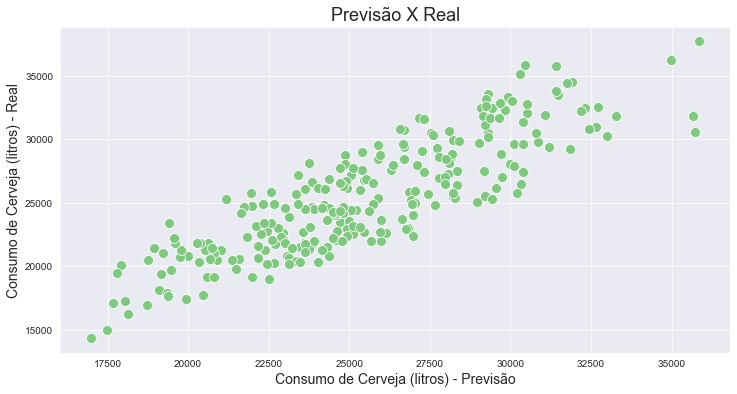

In [47]:
ax = sns.scatterplot(x=y_previsto_train,y=y_train,s = 100)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão',fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real',fontsize = 14)
plt.show()

##### Obtendo os Resíduos

In [48]:
residuo = y_train - y_previsto_train

### Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese da variância constante dos resíduos (homocedasticidade)

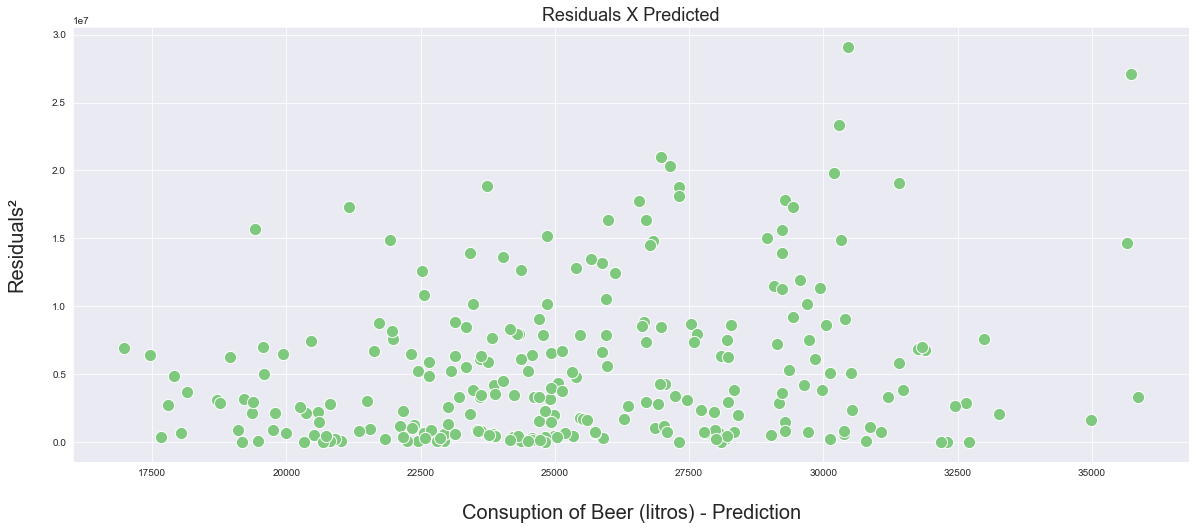

In [51]:
ax = sns.scatterplot(x=y_previsto_train,y=residuo**2,s = 150)

# s - Aumenta as bolinhas 

ax.figure.set_size_inches(20,8)
ax.set_title('Residuals X Predicted', fontsize = 18)
ax.set_xlabel('\nConsuption of Beer (litros) - Prediction',fontsize = 20)
ax.set_ylabel('Residuals²\n',fontsize = 20)

plt.show()

Serve para vermos se o modelo é valido ou não 

##### Plotando a distribuição dos resíduos ( O ideal é que os rsíduos estejas distribuidos como uma curva normal)

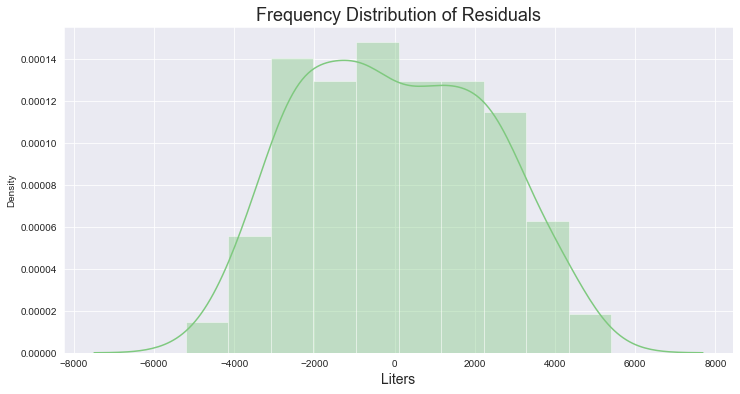

In [53]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution of Residuals', fontsize = 18)
ax.set_xlabel('Liters', fontsize = 14)

plt.show()

## Comparando modelos

Um trabalho muito comum em Data Science, nos modelos de Regressão Linear precisamos testar várias combinações de variáveis até mesmo por que muitas vezes precisamos excluir dados para evitar problema de multicolinearidade e não termos o nosso modelo inválido

##### Criando um novo modelo

In [48]:
data.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900


In [49]:
x2 = data[['Temperatura_Media','Precipitacao','Final_de_Semana']]

In [50]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,test_size = 0.30,random_state = 2811)

In [51]:
model_2 = LinearRegression()

In [52]:
model_2.fit(x2_train,y2_train)

LinearRegression()

In [51]:
model_2.score(x2_train,y2_train)

NameError: name 'model_2' is not defined

In [54]:
model_2.score(x2_test,y2_test)

0.6574588953371101

##### Comparando Modelos

In [55]:
# Modelo Temperatura Máxima

print('Para com o modelo de Temperatura Máxima')
print(f' Dados de Treino R² = {model.score(x_train,y_train).round(2)}')
print(f' Dados de Teste R² = {model.score(x_test,y_test).round(2)}')

Para com o modelo de Temperatura Máxima
 Dados de Treino R² = 0.73
 Dados de Teste R² = 0.69


In [56]:
# Modelo Temperatura Média

print('Para com o modelo de Temperatura Média')
print(f' Dados de Treino R² = {model_2.score(x2_train,y2_train).round(2)}')
print(f' Dados de Teste R² = {model_2.score(x2_test,y2_test).round(2)}')

Para com o modelo de Temperatura Média
 Dados de Treino R² = 0.66
 Dados de Teste R² = 0.66


##### Outras Métricas

Somente o R² não é o suficiente, sendo nescessário a análise de otras métricas para validar melhor o modelo

##### Modelo de Temperatura Máxima

In [57]:
y_previsto = model.predict(x_test)

EQM = metrics.mean_squared_error(y_test,y_previsto)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto))
R2 = metrics.r2_score(y_test,y_previsto)

pd.DataFrame([EQM.round(2),REQM.round(2),R2.round(2)],['EQM','REQM','R²'], columns = ['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


##### Modelo de Temperatura Média

In [58]:
y2_previsto = model_2.predict(x2_test)

EQM_2 = metrics.mean_squared_error(y2_test,y2_previsto)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y2_previsto))
R2_2 = metrics.r2_score(y2_test,y2_previsto)

pd.DataFrame([EQM_2.round(2),REQM_2.round(2),R2_2.round(2)],['EQM','REQM','R²'], columns = ['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Salvando e Carregando o Modelo - Método Pickle

##### Ciêntistas de dados iniciantes fazem assim

In [49]:
x2_test.head(1)

NameError: name 'x2_test' is not defined

In [50]:
predicao_2 = model_2.predict([[23.78,12.2,0.0]])[0].round(2)

predicao_2

NameError: name 'model_2' is not defined

##### Porém para um nível mais intermediário que permita diferente pessoas utilizarem o modelo faz-se de formas diferentes

### Método Pickle - Implementa protocolos binários para serealizar e descerealizar os modelos de Machine Learning

##### Importanto Bibliotecas

In [63]:
import pickle

In [64]:
# wb é o método 
output = open('modelo_consumo_cerveja','wb')
pickle.dump(model,output)
output.close()

In [65]:
x_test.head()

,Temperatura_Maxima,Precipitacao,Final_de_Semana
5,30.5,12.2,0.0
83,27.9,0.0,0.0
40,29.0,32.2,0.0
143,26.3,0.0,1.0
193,28.7,0.0,0.0


### EXTRA - Multicolinearidade

## VIF - Variance Inflation Factor

Correlação não significa multicolinearidade e existem métodos mais eficiêntes para identificarmos este problema um deles é o VIF 

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.

In [68]:
data.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

  
# the independent variables set

X = data[['Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
         'Precipitacao','Final_de_Semana']]
  
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature          VIF
0   Temperatura_Media  1087.797835
1  Temperatura_Minima   249.112601
2  Temperatura_Maxima   436.529190
3        Precipitacao     1.220276
4     Final_de_Semana     1.374283


###### Com isso precisamos excluir algumas variáveis para reduzir o nosso VIF

In [73]:
X = data[['Temperatura_Maxima',
         'Precipitacao','Final_de_Semana']]
  
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0  Temperatura_Maxima  1.528790
1        Precipitacao  1.163160
2     Final_de_Semana  1.373842


##### Como podemos observar acima o VIF reduziu bastante, aumentando a chance de se criar um modelo mais eficiênte